# DeepLabCut Toolbox


Some resources that can be useful:

- [github.com/DeepLabCut/DeepLabCut](https://github.com/DeepLabCut/DeepLabCut)
- [DeepLabCut's Documentation: User Guide for Single Animal projects](https://deeplabcut.github.io/DeepLabCut/docs/standardDeepLabCut_UserGuide.html)

This notebook demonstrates the necessary steps to use DeepLabCut for your own project.
This shows the most simple code to do so, but many of the functions have additional features, so please check out the overview & the protocol paper!

This notebook illustrates how to:
- create a project
- extract training frames
- label the frames
- plot the labeled images
- create a training set
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video 
- plot the trajectories

This notebook demonstrates the necessary steps to use DeepLabCut for your own project.

This shows the most simple code to do so, but many of the functions have additional features, so please check out the overview & the protocol paper!

Nath\*, Mathis\* et al.: Using DeepLabCut for markerless pose estimation during behavior across species. Nature Protocols, 2019.

Paper: https://www.nature.com/articles/s41596-019-0176-0

Pre-print: https://www.biorxiv.org/content/biorxiv/early/2018/11/24/476531.full.pdf

## Create a new project

It is always good idea to keep the projects separate if you want to use different networks to analze your data. You should use one project if you are tracking similar subjects/items even if in different environments. This function creates a new project with sub-directories and a basic configuration file in the user defined directory otherwise the project is created in the current working directory.

You can always add new videos (for lableing more data) to the project at any stage of the project. 

In [ ]:
import deeplabcut

In [7]:
task = "Probe sessions" # Enter the name of your experiment Task
experimenter = "Ashutosh Shukla" # Enter the name of the experimenter
video = [
    "/mnt/nvme4TB/AS/Observational learning/Probe sessions/videos_for_DLC/"
] # Enter the paths of your videos OR FOLDER you want to grab frames from.

path_config_file = deeplabcut.create_new_project(
    task,
    experimenter,
    video,
    copy_videos=True,
)

# NOTE: The function returns the path, where your project is. 
# You could also enter this manually (e.g. if the project is already created and you want to pick up, where you stopped...)
# Enter the path of the config file that was just created from the above step (check the folder):
# path_config_file = "/home/Mackenzie/Reaching/config.yaml"

Created "/home/jadhavdlc/AS/Probe sessions-Ashutosh Shukla-2025-06-02/videos"
Created "/home/jadhavdlc/AS/Probe sessions-Ashutosh Shukla-2025-06-02/labeled-data"
Created "/home/jadhavdlc/AS/Probe sessions-Ashutosh Shukla-2025-06-02/training-datasets"
Created "/home/jadhavdlc/AS/Probe sessions-Ashutosh Shukla-2025-06-02/dlc-models"
10  videos from the directory /mnt/nvme4TB/AS/Observational learning/Probe sessions/videos_for_DLC/ were added to the project.
Copying the videos
/home/jadhavdlc/AS/Probe sessions-Ashutosh Shukla-2025-06-02/videos/log05-23-2025(10-OL4).1.mp4
/home/jadhavdlc/AS/Probe sessions-Ashutosh Shukla-2025-06-02/videos/log05-23-2025(3-OL4).1.mp4
/home/jadhavdlc/AS/Probe sessions-Ashutosh Shukla-2025-06-02/videos/log05-23-2025(4-OL2).1.mp4
/home/jadhavdlc/AS/Probe sessions-Ashutosh Shukla-2025-06-02/videos/log05-23-2025(4-OL2).2.mp4
/home/jadhavdlc/AS/Probe sessions-Ashutosh Shukla-2025-06-02/videos/log05-23-2025(9-OL2).1.mp4
/home/jadhavdlc/AS/Probe sessions-Ashutosh Sh

In [ ]:
path_config_file = "/home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/config.yaml"

## Now, go edit the config.yaml file that was created! 
Add your body part labels, edit the number of frames to extract per video, etc. 

#### Note that you can see more information about ANY function by adding a ? at the end,  i.e. 

In [8]:
deeplabcut.extract_frames?

## Extract frames from videos 
A key point for a successful feature detector is to select diverse frames, which are typical for the behavior you study that should be labeled.

This function selects N frames either uniformly sampled from a particular video (or folder) ('uniform'). Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.

Also make sure to get select data from different (behavioral) sessions and different animals if those vary substantially (to train an invariant feature detector).

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the frame as much as possible.

Always check the output of cropping. If you are happy with the results proceed to labeling.

In [9]:
%matplotlib inline
#there are other ways to grab frames, such as uniformly; please see the paper:

#AUTOMATIC:
deeplabcut.extract_frames(
    path_config_file,
    userfeedback=False
)

# MANUAL
# deeplabcut.extract_frames(
#     path_config_file,
#     mode="manual",
#     algo="kmeans",
#     crop=True,
#     userfeedback=False
# )

Config file read successfully.
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1215.71  seconds.
Extracting and downsampling... 29177  frames from the video.


29177it [02:10, 224.40it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1210.38  seconds.
Extracting and downsampling... 29049  frames from the video.


29049it [02:09, 224.11it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 51.38  seconds.
Extracting and downsampling... 1233  frames from the video.


1233it [00:05, 218.04it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1179.33  seconds.
Extracting and downsampling... 28304  frames from the video.


28304it [02:06, 223.76it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 51.62  seconds.
Extracting and downsampling... 1239  frames from the video.


1239it [00:05, 224.54it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1223.46  seconds.
Extracting and downsampling... 29363  frames from the video.


29363it [02:10, 225.55it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1217.92  seconds.
Extracting and downsampling... 29230  frames from the video.


29230it [02:09, 225.46it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1214.58  seconds.
Extracting and downsampling... 29150  frames from the video.


29150it [02:09, 224.67it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1265.46  seconds.
Extracting and downsampling... 30371  frames from the video.


30371it [02:15, 223.42it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1232.71  seconds.
Extracting and downsampling... 29585  frames from the video.


29585it [02:11, 224.23it/s]


Kmeans clustering ... (this might take a while)
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


## Label the extracted frames

Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

Check out [our `napari-deeplabcut` docs](https://github.com/DeepLabCut/napari-deeplabcut/tree/main) for more information about labelling!

In [3]:
# napari will pop up!
# Please go to plugin > deeplabcut to start
# then, drag-and-drop the project configuration file into the viewer (the value of path_config_file)
# finally, drop the folder containing the images (in 'labeled-data') in the viewer

%gui qt6
import napari
napari.Viewer()

Viewer(camera=Camera(center=(0.0, 0.0, 0.0), zoom=1.0, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0, 2, 1), (0, 2, 1)), current_step=(0, 0), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[], help='', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x7f6bf51267a0>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, keymap={})

## Check the labels

[OPTIONAL] Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. The DeepLabCut toolbox provides a function `check\_labels'  to do so. It is used as follows:

In [16]:
deeplabcut.check_labels(path_config_file) # this creates a subdirectory with the frames + your labels

Creating images with labels by Ashutosh Shukla.
Attention: /home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/labeled-data/log05-12-2025(1-OL1).3 does not appear to have labeled data!
Attention: /home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/labeled-data/log05-12-2025(11-OL3).1 does not appear to have labeled data!
Attention: /home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/labeled-data/log05-12-2025(2-OL3).1 does not appear to have labeled data!
Attention: /home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/labeled-data/log05-12-2025(3-OL1).1 does not appear to have labeled data!
Attention: /home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/labeled-data/log05-12-2025(4-OL3).1 does not appear to have labeled data!
Attention: /home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/labeled-data/log05-12-2025(7-OL1).1 does not appear to have labeled data!
Attention: /home/jadhavdlc/AS/Dem

100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.94it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


If the labels need adjusted, you can use relauch the labeling GUI to move them around, save, and re-plot!

## Create a training dataset

This function generates the training data information for network training based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles if they want to benchmark the performance (typcailly, 1 is what you will set, so you pass nothing!). 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models-pytorch** and creates a `pytorch_config.yaml` file, defining the model architecture and containing various parameters used for training the network. For most all use cases we have seen, the defaults are perfectly fine. For more information about the variables that can be set, check out the [docs](https://deeplabcut.github.io/DeepLabCut/docs/pytorch/pytorch_config.html)!

Now it is the time to start training the network!

In [17]:
deeplabcut.create_training_dataset(path_config_file)

# remember, there are several networks you can pick, the default is resnet-50!

/home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/labeled-data/log05-12-2025(1-OL1).3/CollectedData_Ashutosh Shukla.h5  not found (perhaps not annotated).
/home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/labeled-data/log05-12-2025(11-OL3).1/CollectedData_Ashutosh Shukla.h5  not found (perhaps not annotated).
/home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/labeled-data/log05-12-2025(2-OL3).1/CollectedData_Ashutosh Shukla.h5  not found (perhaps not annotated).
/home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/labeled-data/log05-12-2025(3-OL1).1/CollectedData_Ashutosh Shukla.h5  not found (perhaps not annotated).
/home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/labeled-data/log05-12-2025(4-OL3).1/CollectedData_Ashutosh Shukla.h5  not found (perhaps not annotated).
/home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/labeled-data/log05-12-2025(7-OL1).1/CollectedData_Ashutosh Shukla.

[(0.95,
  1,
  (array([ 98,  36,  79,  64,  22,  76,  75,  62,  10, 102, 114,  80,  33,
           25,  24,  97, 115,  44, 106,  71,  45,  95,  70,   5, 101,  26,
            2, 131,   7,  37,  67,  91,  99,  30, 124, 104, 108, 107,  92,
            3, 118,  89,  49,  59,  14,  43,  83, 110, 117,  19, 128,  55,
           65, 142,  51,  81,  96,  66,  78,  21,  50,  34,  63, 134,  32,
           56, 103, 137,   1,  87, 112,  84,   8,  20, 122, 132,  60, 140,
          116,  29,  94, 111, 123, 120,  42,  35,  11, 127, 125, 135,  48,
           12,  90,  69,  39,  31,  13,  23,  74,  68, 121,  73,  93, 139,
          141,  77,  57, 119,  85, 138,  82,  38,   9,  41, 143, 144,   0,
           16,  58,  28, 109, 113,  46,  54, 129,  88,  86,  15,  27, 133,
          130,   6,   4,  17,  53, 136,  61]),
   array([ 72,  18,  47,  52, 105, 100, 126,  40])))]

## Start training:

The user can set various parameters in `.../project-name/dlc-models-pytorch/.../pytorch_config.yaml`. For more information about the variables that can be set, check out the [docs](https://deeplabcut.github.io/DeepLabCut/docs/pytorch/pytorch_config.html)!

This function trains the network for a specific shuffle of the training dataset. 

In [18]:
deeplabcut.train_network(path_config_file)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21]],
 'all_joints_names': ['nose',
                      'left ear',
                      'right ear',
                      'head',
                      'neck',
                      'body center',
                      'tail base',
                      'left well',
                      'center well',
                      'right well',
                      'Left reward zone 1',
                      'Left reward zone 2',
                      'Left reward zone 3',
                      'Left reward zone 4',
  

Selecting single-animal trainer
Batch Size is 1


/home/jadhavdlc/miniconda3/envs/dlc/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2025-06-02 17:12:02.406253: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-02 17:12:02.579579: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-02 17:12:02.579684: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-02 17:12:02.581218: I tensorflow/cor

Loading ImageNet-pretrained resnet_50


2025-06-02 17:12:02.790414: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-02 17:12:02.790522: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-02 17:12:02.790572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-02 17:12:02.790651: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-02 17:12:02.790700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/dlc-models/iteration-0/Demonstrator trainingMay30-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'default', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], 

2025-06-02 17:12:04.903344: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2025-06-02 17:12:05.208242: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
iteration: 1000 loss: 0.0247 lr: 0.005
iteration: 2000 loss: 0.0125 lr: 0.005
iteration: 3000 loss: 0.0102 lr: 0.005
iteration: 4000 loss: 0.0089 lr: 0.005
iteration: 5000 loss: 0.0079 lr: 0.005
iteration: 6000 loss: 0.0075 lr: 0.005
iteration: 7000 loss: 0.0070 lr: 0.005
iteration: 8000 loss: 0.0066 lr: 0.005
iteration: 9000 loss: 0.0063 lr: 0.005
iteration: 10000 loss: 0.0060 lr: 0.005
iteration: 11000 loss: 0.0067 lr: 0.02
iteration: 12000 loss: 0.0057 lr: 0.02
iteration: 13000 loss: 0.0052 lr: 0.02
iteration: 14000 loss: 0.0047 lr: 0.02
iteration: 15000 loss: 0.0044 lr: 0.02
iteration: 16000 loss: 0.0042 lr: 0.02
iteration: 17000 loss: 0.0041 lr: 0.02
iteration: 18000 loss: 0.0038 lr: 0.02
iteration: 19000 loss

iteration: 202000 loss: 0.0015 lr: 0.02
iteration: 203000 loss: 0.0015 lr: 0.02
iteration: 204000 loss: 0.0015 lr: 0.02
iteration: 205000 loss: 0.0015 lr: 0.02
iteration: 206000 loss: 0.0016 lr: 0.02
iteration: 207000 loss: 0.0015 lr: 0.02
iteration: 208000 loss: 0.0015 lr: 0.02
iteration: 209000 loss: 0.0015 lr: 0.02
iteration: 210000 loss: 0.0015 lr: 0.02
iteration: 211000 loss: 0.0015 lr: 0.02
iteration: 212000 loss: 0.0015 lr: 0.02
iteration: 213000 loss: 0.0015 lr: 0.02
iteration: 214000 loss: 0.0015 lr: 0.02
iteration: 215000 loss: 0.0015 lr: 0.02
iteration: 216000 loss: 0.0015 lr: 0.02
iteration: 217000 loss: 0.0015 lr: 0.02
iteration: 218000 loss: 0.0015 lr: 0.02
iteration: 219000 loss: 0.0015 lr: 0.02
iteration: 220000 loss: 0.0015 lr: 0.02
iteration: 221000 loss: 0.0015 lr: 0.02
iteration: 222000 loss: 0.0015 lr: 0.02
iteration: 223000 loss: 0.0015 lr: 0.02
iteration: 224000 loss: 0.0015 lr: 0.02
iteration: 225000 loss: 0.0015 lr: 0.02
iteration: 226000 loss: 0.0015 lr: 0.02


iteration: 407000 loss: 0.0013 lr: 0.02
iteration: 408000 loss: 0.0013 lr: 0.02
iteration: 409000 loss: 0.0014 lr: 0.02
iteration: 410000 loss: 0.0014 lr: 0.02
iteration: 411000 loss: 0.0013 lr: 0.02
iteration: 412000 loss: 0.0014 lr: 0.02
iteration: 413000 loss: 0.0013 lr: 0.02
iteration: 414000 loss: 0.0013 lr: 0.02
iteration: 415000 loss: 0.0013 lr: 0.02
iteration: 416000 loss: 0.0013 lr: 0.02
iteration: 417000 loss: 0.0014 lr: 0.02
iteration: 418000 loss: 0.0013 lr: 0.02
iteration: 419000 loss: 0.0013 lr: 0.02
iteration: 420000 loss: 0.0014 lr: 0.02
iteration: 421000 loss: 0.0013 lr: 0.02
iteration: 422000 loss: 0.0013 lr: 0.02
iteration: 423000 loss: 0.0014 lr: 0.02
iteration: 424000 loss: 0.0013 lr: 0.02
iteration: 425000 loss: 0.0014 lr: 0.02
iteration: 426000 loss: 0.0013 lr: 0.02
iteration: 427000 loss: 0.0013 lr: 0.02
iteration: 428000 loss: 0.0013 lr: 0.02
iteration: 429000 loss: 0.0013 lr: 0.02
iteration: 430000 loss: 0.0013 lr: 0.02
iteration: 431000 loss: 0.0013 lr: 0.002

iteration: 608000 loss: 0.0012 lr: 0.002
iteration: 609000 loss: 0.0012 lr: 0.002
iteration: 610000 loss: 0.0012 lr: 0.002
iteration: 611000 loss: 0.0012 lr: 0.002
iteration: 612000 loss: 0.0012 lr: 0.002
iteration: 613000 loss: 0.0012 lr: 0.002
iteration: 614000 loss: 0.0012 lr: 0.002
iteration: 615000 loss: 0.0012 lr: 0.002
iteration: 616000 loss: 0.0012 lr: 0.002
iteration: 617000 loss: 0.0012 lr: 0.002
iteration: 618000 loss: 0.0012 lr: 0.002
iteration: 619000 loss: 0.0012 lr: 0.002
iteration: 620000 loss: 0.0012 lr: 0.002
iteration: 621000 loss: 0.0012 lr: 0.002
iteration: 622000 loss: 0.0012 lr: 0.002
iteration: 623000 loss: 0.0012 lr: 0.002
iteration: 624000 loss: 0.0012 lr: 0.002
iteration: 625000 loss: 0.0012 lr: 0.002
iteration: 626000 loss: 0.0012 lr: 0.002
iteration: 627000 loss: 0.0012 lr: 0.002
iteration: 628000 loss: 0.0012 lr: 0.002
iteration: 629000 loss: 0.0012 lr: 0.002
iteration: 630000 loss: 0.0012 lr: 0.002
iteration: 631000 loss: 0.0012 lr: 0.002
iteration: 63200

iteration: 808000 loss: 0.0012 lr: 0.001
iteration: 809000 loss: 0.0012 lr: 0.001
iteration: 810000 loss: 0.0012 lr: 0.001
iteration: 811000 loss: 0.0012 lr: 0.001
iteration: 812000 loss: 0.0012 lr: 0.001
iteration: 813000 loss: 0.0011 lr: 0.001
iteration: 814000 loss: 0.0012 lr: 0.001
iteration: 815000 loss: 0.0012 lr: 0.001
iteration: 816000 loss: 0.0012 lr: 0.001
iteration: 817000 loss: 0.0012 lr: 0.001
iteration: 818000 loss: 0.0012 lr: 0.001
iteration: 819000 loss: 0.0012 lr: 0.001
iteration: 820000 loss: 0.0012 lr: 0.001
iteration: 821000 loss: 0.0012 lr: 0.001
iteration: 822000 loss: 0.0012 lr: 0.001
iteration: 823000 loss: 0.0012 lr: 0.001
iteration: 824000 loss: 0.0012 lr: 0.001
iteration: 825000 loss: 0.0012 lr: 0.001
iteration: 826000 loss: 0.0012 lr: 0.001
iteration: 827000 loss: 0.0012 lr: 0.001
iteration: 828000 loss: 0.0012 lr: 0.001
iteration: 829000 loss: 0.0012 lr: 0.001
iteration: 830000 loss: 0.0012 lr: 0.001
iteration: 831000 loss: 0.0012 lr: 0.001
iteration: 83200

iteration: 1008000 loss: 0.0012 lr: 0.001
iteration: 1009000 loss: 0.0012 lr: 0.001
iteration: 1010000 loss: 0.0012 lr: 0.001
iteration: 1011000 loss: 0.0012 lr: 0.001
iteration: 1012000 loss: 0.0012 lr: 0.001
iteration: 1013000 loss: 0.0012 lr: 0.001
iteration: 1014000 loss: 0.0012 lr: 0.001
iteration: 1015000 loss: 0.0012 lr: 0.001
iteration: 1016000 loss: 0.0012 lr: 0.001
iteration: 1017000 loss: 0.0012 lr: 0.001
iteration: 1018000 loss: 0.0012 lr: 0.001
iteration: 1019000 loss: 0.0012 lr: 0.001
iteration: 1020000 loss: 0.0012 lr: 0.001
iteration: 1021000 loss: 0.0012 lr: 0.001
iteration: 1022000 loss: 0.0012 lr: 0.001
iteration: 1023000 loss: 0.0012 lr: 0.001
iteration: 1024000 loss: 0.0012 lr: 0.001
iteration: 1025000 loss: 0.0012 lr: 0.001
iteration: 1026000 loss: 0.0012 lr: 0.001
iteration: 1027000 loss: 0.0012 lr: 0.001
iteration: 1028000 loss: 0.0012 lr: 0.001
iteration: 1029000 loss: 0.0012 lr: 0.001
iteration: 1030000 loss: 0.0012 lr: 0.001
2025-06-03 09:37:26.861708: W tens

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


## Start evaluating
This function evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results-pytorch**

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21]],
 'all_joints_names': ['nose',
                      'left ear',
                      'right ear',
                      'head',
                      'neck',
                      'body center',
                      'tail base',
                      'left well',
                      'center well',
                      'right well',
                      'Left reward zone 1',
                      'Left reward zone 2',
                      'Left reward zone 3',
                      'Left reward zone 4',
  

Running  DLC_resnet50_Demonstrator trainingMay30shuffle1_1030000  with # of training iterations: 1030000


2025-06-03 10:06:57.700670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-03 10:06:57.700789: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-03 10:06:57.700843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-03 10:06:57.700959: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-03 10:06:57.701019: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

Running evaluation ...


145it [00:08, 17.49it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-1030000
Results for 1030000  training iterations: 95 1 train error: 3.02 pixels. Test error: 3.45  pixels.
With pcutoff of 0.6  train error: 2.94 pixels. Test error: 3.18 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|█████████████████████████████████████████| 145/145 [00:32<00:00,  4.50it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


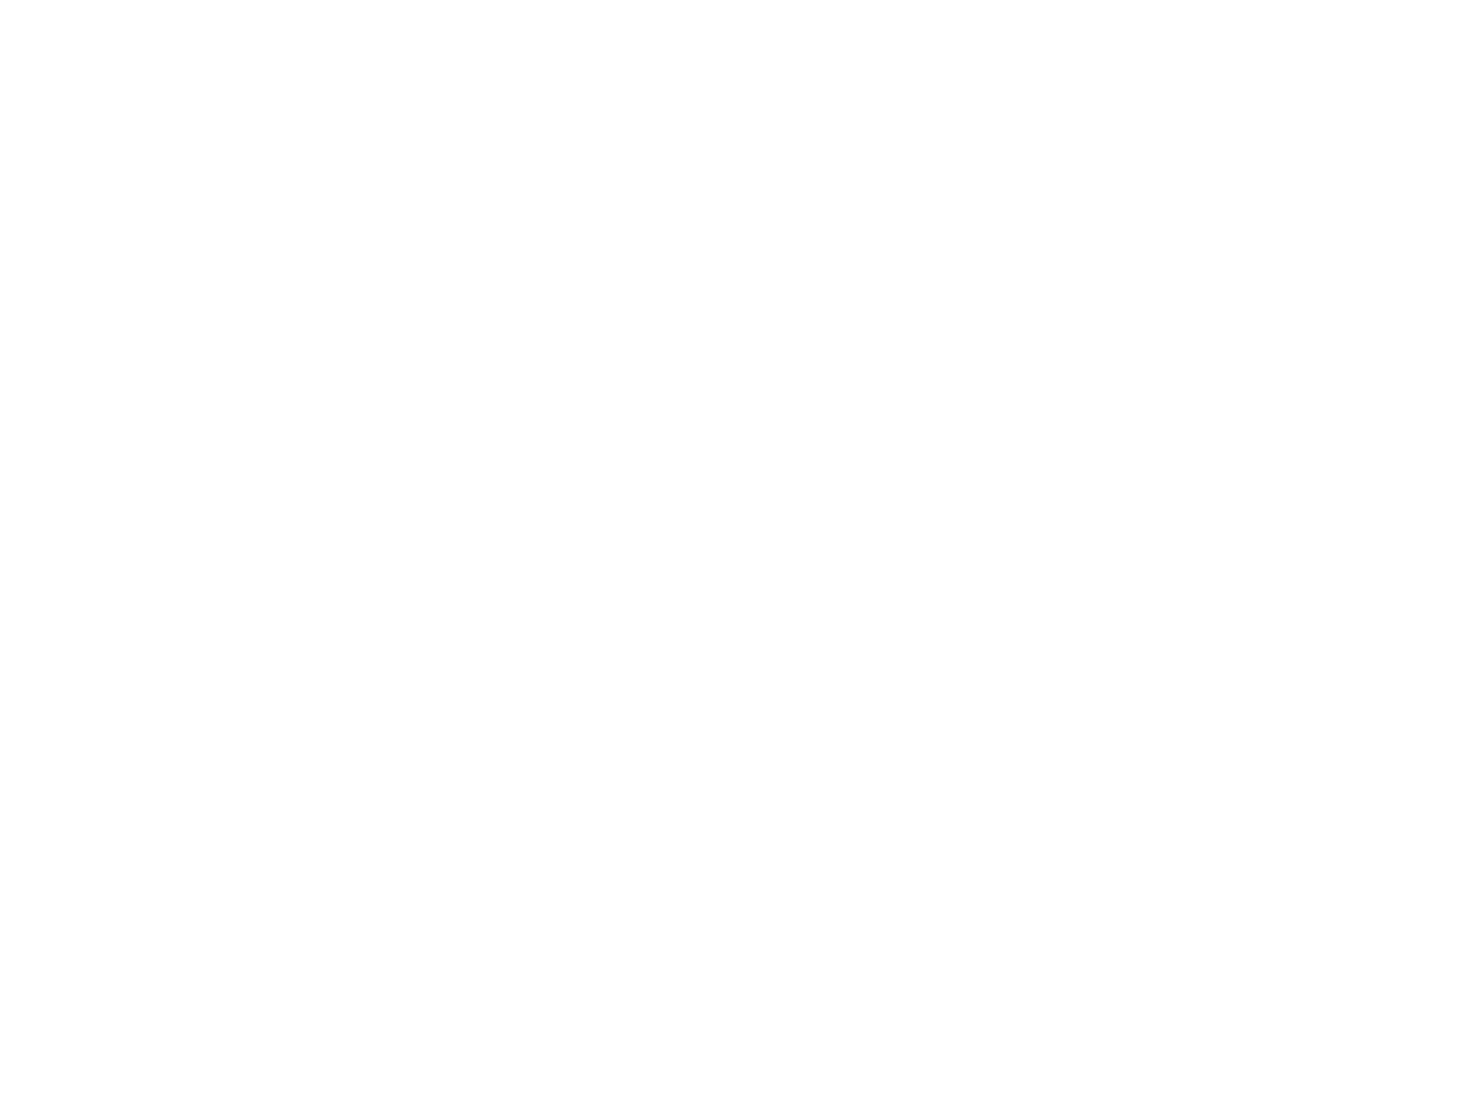

In [19]:
deeplabcut.evaluate_network(path_config_file, plotting=True)

## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [ ]:
import os

folder_path = '/home/jadhavdlc/AS/Demonstrator training-Ashutosh Shukla-2025-05-30/videos/'

# List to store file paths
videofile_path = []

# Walk through the directory
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.mp4'):
            # Add the full file path to the list
            videofile_path.append(os.path.join(root, file))

# Print or return the list of video file paths
print(videofile_path)


deeplabcut.analyze_videos(path_config_file,videofile_path, videotype='.mp4')

## Extract outlier frames [optional step]

This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. This step has many options, so please look at:

In [ ]:
deeplabcut.extract_outlier_frames?

In [ ]:
deeplabcut.extract_outlier_frames(path_config_file,['/videos/video3.avi']) #pass a specific video

## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset. 

In [ ]:
%gui qt6
deeplabcut.refine_labels(path_config_file)

**NOTE:** Afterwards, if you want to look at the adjusted frames, you can load them in the main GUI by running: ``deeplabcut.label_frames(path_config_file)``

(you can add a new "cell" below to add this code!)

#### Once all folders are relabeled, check the labels again! If you are not happy, adjust them in the main GUI:

``deeplabcut.label_frames(path_config_file)``

Check Labels:

``deeplabcut.check_labels(path_config_file)``

In [ ]:
#NOW, merge this with your original data:

deeplabcut.merge_datasets(path_config_file)

## Create a new iteration of training dataset [optional step]
Following the refinement of labels and appending them to the original dataset, this creates a new iteration of training dataset. This is automatically set in the config.yaml file, so let's get training!

In [ ]:
deeplabcut.create_training_dataset(path_config_file)

## Create labeled video

This function is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

THIS HAS MANY FUN OPTIONS! 

```python
deeplabcut.create_labeled_video(
    config,
    videos,
    videotype='avi',
    shuffle=1,
    trainingsetindex=0,
    filtered=False,
    save_frames=False,
    Frames2plot=None,
    delete=False,
    displayedbodyparts='all',
    codec='mp4v',
    outputframerate=None,
    destfolder=None,
    draw_skeleton=False,
    trailpoints=0,
    displaycropped=False,
)
```

So please check:

In [ ]:
deeplabcut.create_labeled_video?

In [ ]:
deeplabcut.create_labeled_video(path_config_file,videofile_path)

## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [ ]:
%matplotlib notebook #for making interactive plots.
deeplabcut.plot_trajectories(path_config_file, videofile_path)